In [1]:
import math
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import scipy.stats as st
import pandas_profiling as pf
import pickle

c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Importing data

In [2]:
df = pd.read_csv("Data/cardio_train.csv",sep=';')

## Creating profile of non cleaned data

In [80]:
profile_not_clean = pf.ProfileReport(df)
profile_not_clean
profile_not_clean.to_file("../templates/AnalysisNotClean.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 111.38it/s]


# Data exploration

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69301 entries, 0 to 69300
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           69301 non-null  int64  
 1   age          69301 non-null  int64  
 2   gender       69301 non-null  int64  
 3   height       69301 non-null  int64  
 4   weight       69301 non-null  float64
 5   ap_hi        69301 non-null  int64  
 6   ap_lo        69301 non-null  int64  
 7   cholesterol  69301 non-null  int64  
 8   gluc         69301 non-null  int64  
 9   smoke        69301 non-null  int64  
 10  alco         69301 non-null  int64  
 11  active       69301 non-null  int64  
 12  cardio       69301 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [82]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,50471.480397,19468.786280,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,28563.100347,2467.261818,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,988.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25745.000000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50494.000000,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,75150.000000,21326.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [83]:
cardio_count=df["cardio"].value_counts()
cardio_count

0    34679
1    34622
Name: cardio, dtype: int64

In [84]:
cario_percent = ( df["cardio"].value_counts() / df['cardio'].count()) * 100
cario_percent

0    50.041125
1    49.958875
Name: cardio, dtype: float64

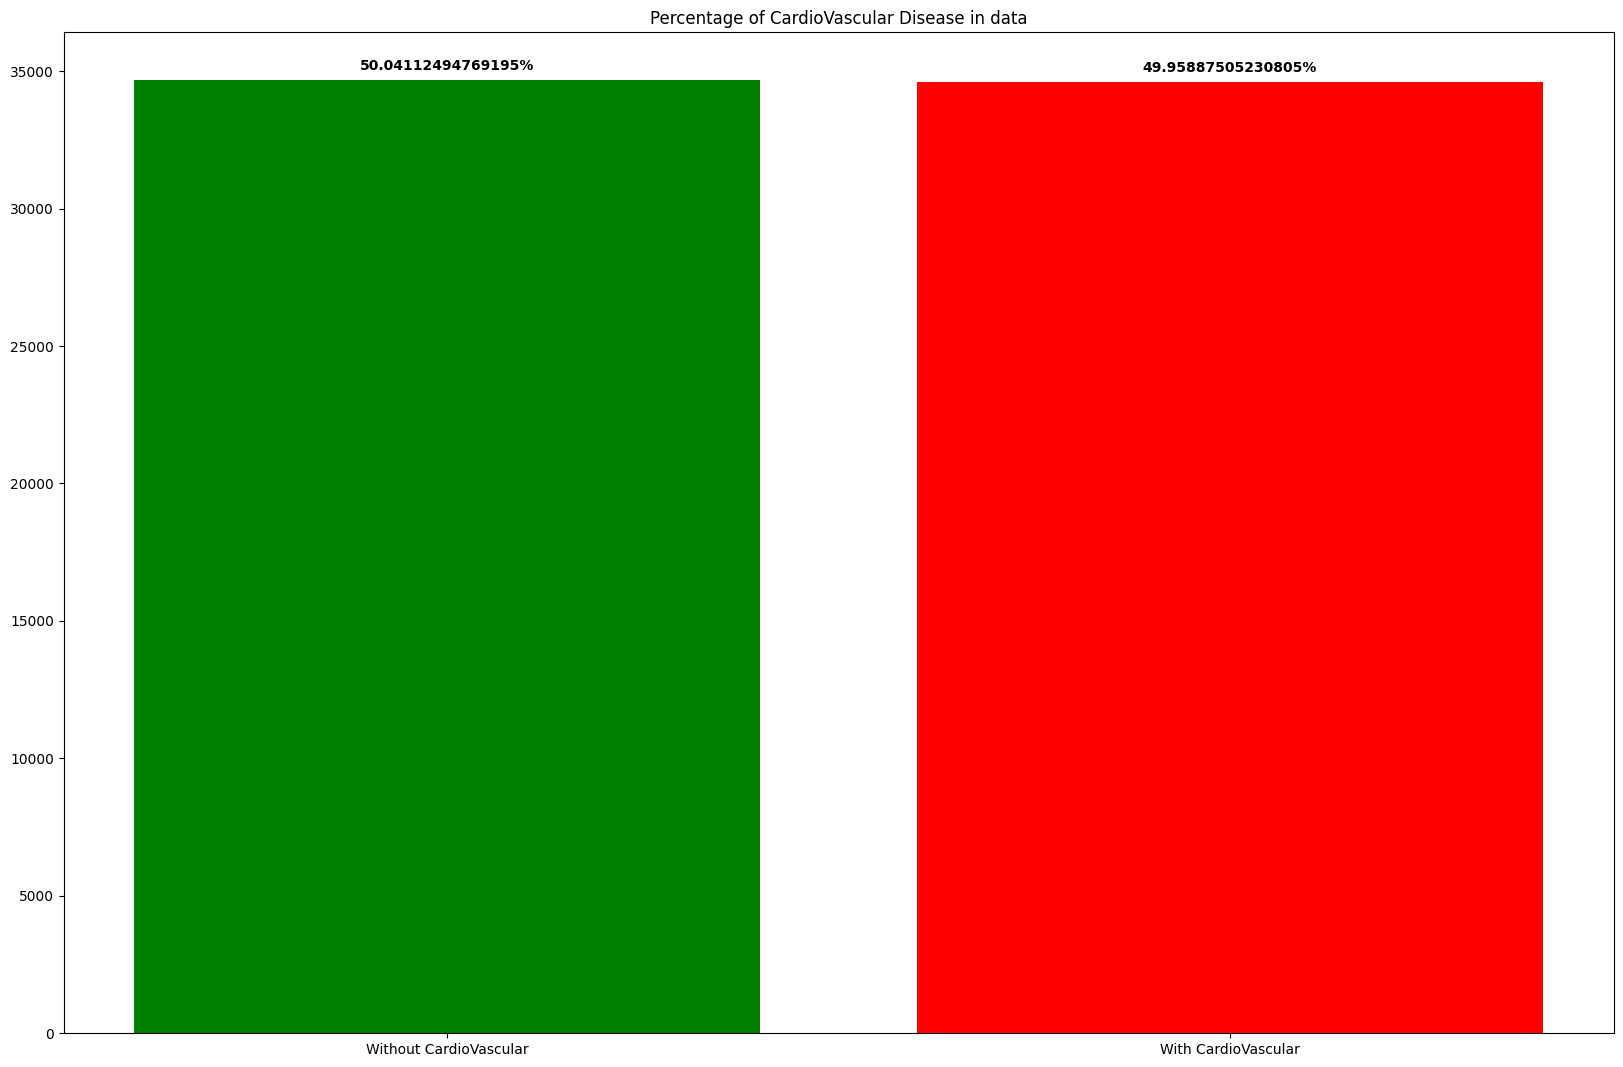

In [85]:
plt.figure(figsize=(20,13))
colors_list = ['Green','Red']
graph = plt.bar(["Without CardioVascular","With CardioVascular"],cardio_count, color = colors_list)
plt.title('Percentage of CardioVascular Disease in data')

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,y+height*1.01,str(cario_percent[i])+'%',ha='center',weight='bold')
    i+=1
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15904\2936690794.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax=ax);


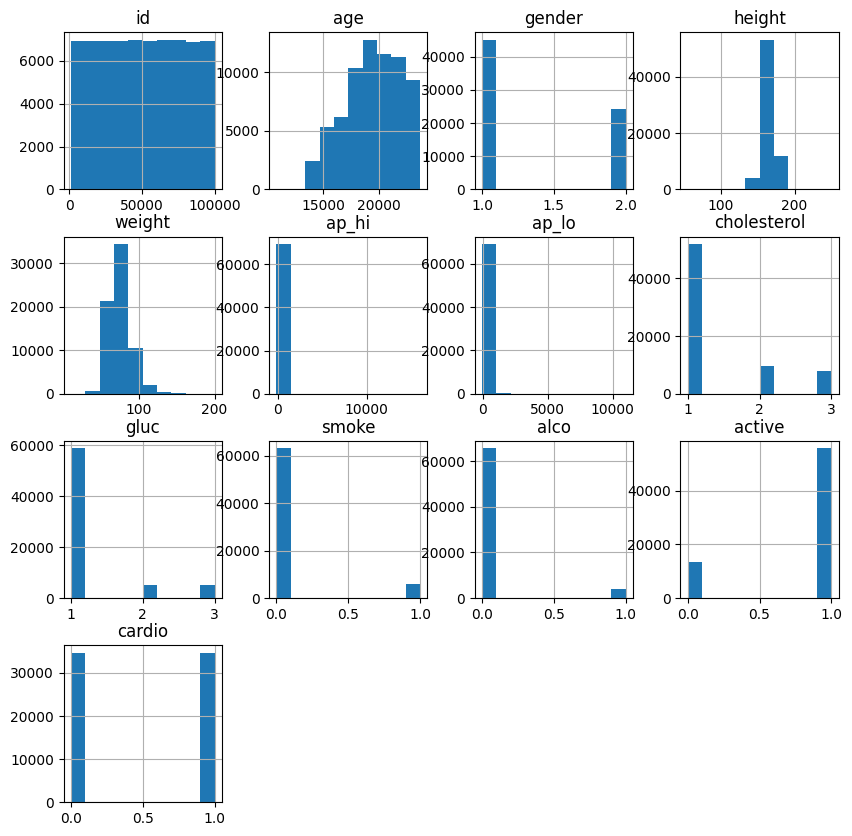

In [86]:
fig= plt.figure(figsize=(10,10))
ax= fig.gca()
df.hist(ax=ax);

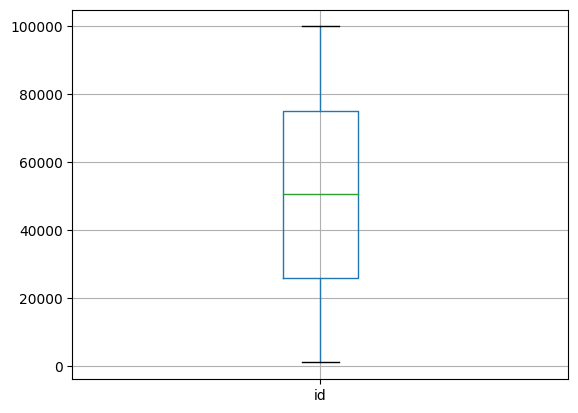

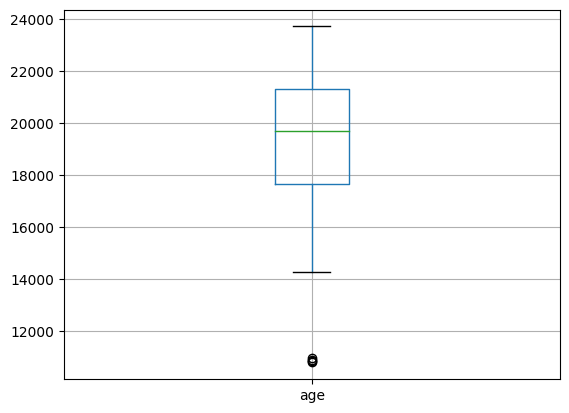

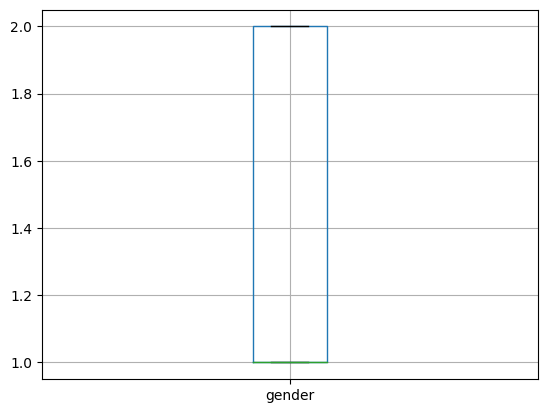

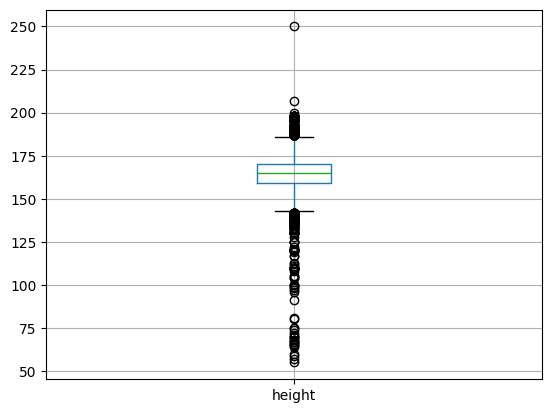

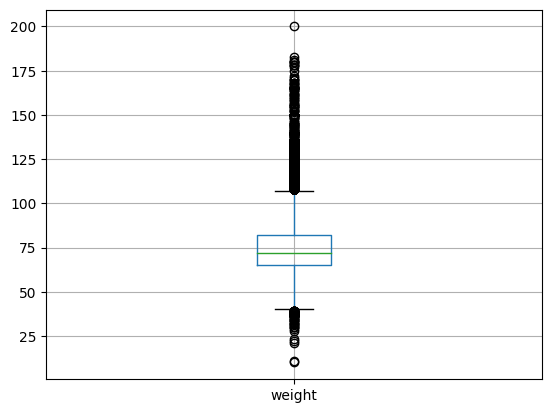

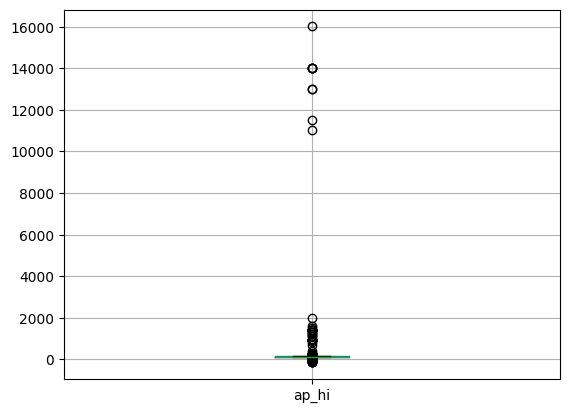

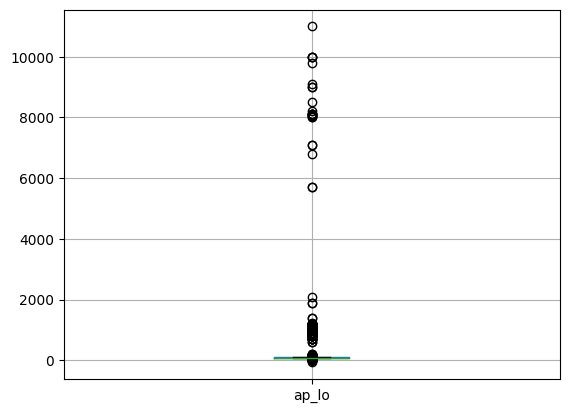

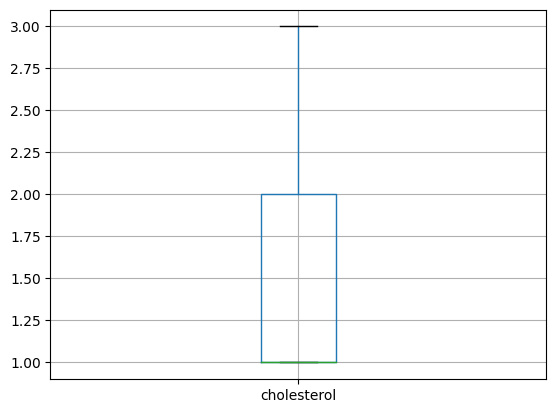

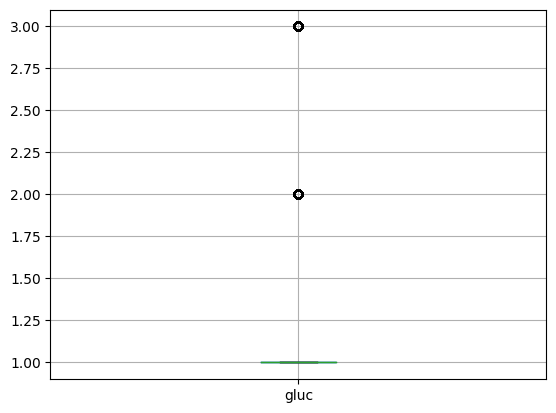

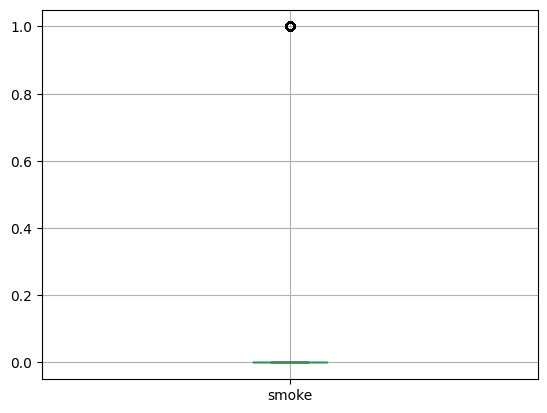

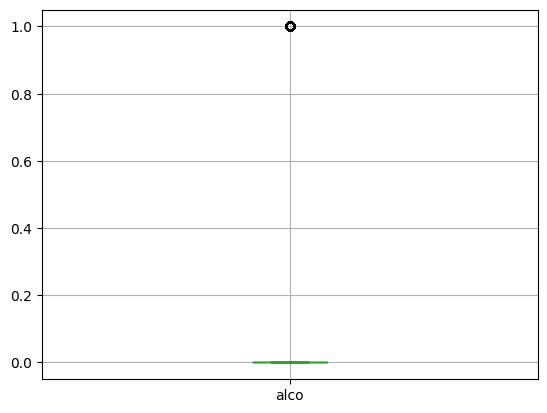

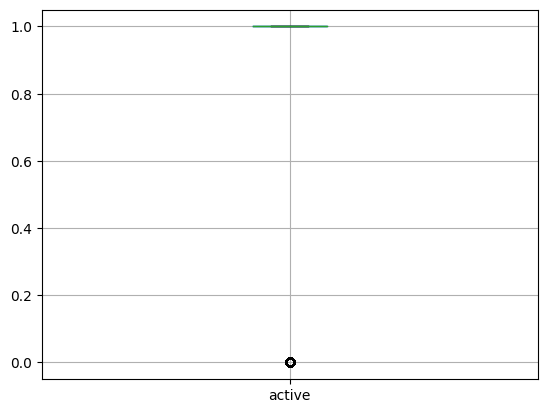

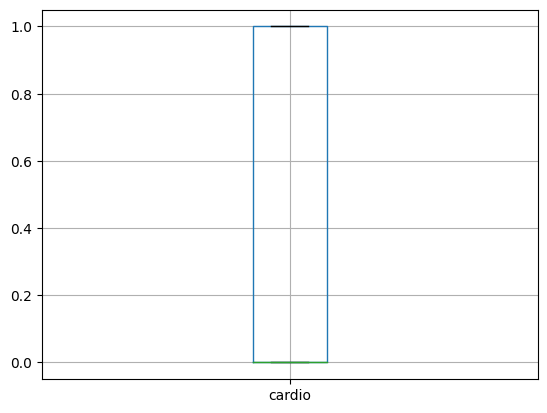

In [87]:
for column in df:
    plt.figure()
    
    df.boxplot([column])

# Data Cleaning

In [88]:
# Droping id (Not needed for the model)
df=df.drop(labels="id", axis=1)

In [89]:
# Checking for duplicates
sum(df.duplicated())

24

In [90]:
# Droping Duplicates
df=df.drop_duplicates()
sum(df.duplicated())

0

## ap_hi Cleaning

In [91]:
#Highest recorded blood pressure 370/360
#Lowestrded blood pressure 90/60

In [92]:
df["ap_hi"].unique()

array([  130,   110,   120,   100,   140,   160,   170,   150,   147,
         115,    90,   180,    14,   125,   135,   190,   137,   153,
          11,   145,   148,   126,   105,   220,   119,   141,   165,
         164,    12,   124,   172,   902,   162,   906,   117,   134,
         166,   210,   176,   133,   116,   169,    10,   121,    16,
          80,   112,   159,   122,   113,   118,   200,   155,   142,
         131,   157,   136,   146,   138,  -100,   909,    70,   109,
          85,   106,   129,    93,     7,    95,   179,   161,   156,
         168,   132,   104,   103,   178,   175,   123,   128,   151,
          15,   139, 11500,   127,    17,   108,   144,   158,   102,
           1,  1420,    13,   143,   701,   107,   184,   149,   167,
         114,   101,    60,  1500,   181,   171,   202,  -115,   111,
         907,    20,   188,   185,   163,   173,   154,   177,  -140,
         174,  -120, 14020,  1400,   240,   191,   197,  1620,   152,
          96,   199,

In [93]:
df["ap_hi"]=df["ap_hi"].abs()
df["ap_hi"].unique()

array([  130,   110,   120,   100,   140,   160,   170,   150,   147,
         115,    90,   180,    14,   125,   135,   190,   137,   153,
          11,   145,   148,   126,   105,   220,   119,   141,   165,
         164,    12,   124,   172,   902,   162,   906,   117,   134,
         166,   210,   176,   133,   116,   169,    10,   121,    16,
          80,   112,   159,   122,   113,   118,   200,   155,   142,
         131,   157,   136,   146,   138,   909,    70,   109,    85,
         106,   129,    93,     7,    95,   179,   161,   156,   168,
         132,   104,   103,   178,   175,   123,   128,   151,    15,
         139, 11500,   127,    17,   108,   144,   158,   102,     1,
        1420,    13,   143,   701,   107,   184,   149,   167,   114,
         101,    60,  1500,   181,   171,   202,   111,   907,    20,
         188,   185,   163,   173,   154,   177,   174, 14020,  1400,
         240,   191,   197,  1620,   152,    96,   199,  1130,   193,
          99,   196,

In [94]:
sum(df["ap_hi"]>370)

39

In [95]:
sum(df["ap_hi"]<90)

310

In [96]:
df["ap_hi"].describe()

count    69277.000000
mean       128.857182
std        154.782206
min          1.000000
25%        120.000000
50%        120.000000
75%        140.000000
max      16020.000000
Name: ap_hi, dtype: float64

In [97]:
def pressure_range(x):
    """ Function to adjust pressure numbers as 3 or 2 digits only"""
    if math.log10(x)>=4:
        z= x//100
    elif math.log10(x)>=3:
        z= x//10
    elif math.log10(x)<2 and x<50:
        z= x*10
    else :z= x   
    return z

In [98]:
df["ap_hi"]=df["ap_hi"].apply(pressure_range)
df["ap_hi"].unique()

array([130, 110, 120, 100, 140, 160, 170, 150, 147, 115,  90, 180, 125,
       135, 190, 137, 153, 145, 148, 126, 105, 220, 119, 141, 165, 164,
       124, 172, 902, 162, 906, 117, 134, 166, 210, 176, 133, 116, 169,
       121,  80, 112, 159, 122, 113, 118, 200, 155, 142, 131, 157, 136,
       146, 138, 909,  70, 109,  85, 106, 129,  93,  95, 179, 161, 156,
       168, 132, 104, 103, 178, 175, 123, 128, 151, 139, 127, 108, 144,
       158, 102,  10, 143, 701, 107, 184, 149, 167, 114, 101,  60, 181,
       171, 202, 111, 907, 188, 185, 163, 173, 154, 177, 174, 240, 191,
       197, 152,  96, 199, 193,  99, 196, 309, 401, 806, 230, 207, 215,
        97, 960, 195, 187], dtype=int64)

In [99]:
sum(df["ap_hi"]>370)

15

In [100]:
df=df[df["ap_hi"].between(80,370)]
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69241.000000,69241.000000,69241.000000,69241.000000,69241.000000,69241.000000,69241.000000,69241.000000,69241.000000,69241.000000,69241.000000,69241.000000
mean,19469.437486,1.349634,164.363239,74.210656,127.018862,96.613235,1.367008,1.226484,0.088069,0.053855,0.803989,0.499805
std,2467.155592,0.476858,8.206934,14.384718,17.097522,188.947057,0.680414,0.572253,0.283398,0.225734,0.396980,0.500004
min,10798.000000,1.000000,55.000000,10.000000,80.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17666.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,309.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


## ap_lo Cleaning

In [101]:
df["ap_lo"].unique()

array([   80,    70,    90,   100,  1000,    60,    79,    78,   110,
          84,    75,  1100,    85,    86,    87,  1001,    82,    95,
          69,    74,    97,    65,   120,    81,    73,    89,  1200,
          83,   119,    50,    93,   105, 10000,   150,    99,    77,
          59,  8044,   140,    92,  1044,   108,   125,   115,    68,
          61,   106,   102,    91,    94,    66,    52,   170,    76,
         160,    62,    30,    96,   130,   113,    67,  9100,  1033,
          10,    88,   902,     8,   112,   104,    71,    72,  1008,
          98,    20,   802,  8000,  1022,   850,    40,   708,    57,
         101,  9011,  1011,    64,     0,  1007,  1177,  7100,   109,
          45,   709,    63,  8500,   800,    58,  1110,  8099,  1088,
         126,  1077,  1120,     7,   103,  1125,   180,   121,  8100,
         710,  5700,  8079,  1111,  1003,     6,  1900,   809,   114,
         801,  1002,    53,   111,     1,   118,    56,   182,   810,
           9,  7099,

In [102]:
df["ap_lo"]=df["ap_lo"].abs()
df["ap_lo"].unique()

array([   80,    70,    90,   100,  1000,    60,    79,    78,   110,
          84,    75,  1100,    85,    86,    87,  1001,    82,    95,
          69,    74,    97,    65,   120,    81,    73,    89,  1200,
          83,   119,    50,    93,   105, 10000,   150,    99,    77,
          59,  8044,   140,    92,  1044,   108,   125,   115,    68,
          61,   106,   102,    91,    94,    66,    52,   170,    76,
         160,    62,    30,    96,   130,   113,    67,  9100,  1033,
          10,    88,   902,     8,   112,   104,    71,    72,  1008,
          98,    20,   802,  8000,  1022,   850,    40,   708,    57,
         101,  9011,  1011,    64,     0,  1007,  1177,  7100,   109,
          45,   709,    63,  8500,   800,    58,  1110,  8099,  1088,
         126,  1077,  1120,     7,   103,  1125,   180,   121,  8100,
         710,  5700,  8079,  1111,  1003,     6,  1900,   809,   114,
         801,  1002,    53,   111,     1,   118,    56,   182,   810,
           9,  7099,

In [103]:
df["ap_lo"].describe()

count    69241.000000
mean        96.615257
std        188.946023
min          0.000000
25%         80.000000
50%         80.000000
75%         90.000000
max      11000.000000
Name: ap_lo, dtype: float64

In [104]:
sum(df["ap_lo"]>360)

940

In [105]:
sum(df["ap_lo"]<60)

158

In [106]:
sum(df["ap_lo"]==0)

15

In [107]:
df=df[df["ap_lo"]!=0]
df["ap_lo"].unique()

array([   80,    70,    90,   100,  1000,    60,    79,    78,   110,
          84,    75,  1100,    85,    86,    87,  1001,    82,    95,
          69,    74,    97,    65,   120,    81,    73,    89,  1200,
          83,   119,    50,    93,   105, 10000,   150,    99,    77,
          59,  8044,   140,    92,  1044,   108,   125,   115,    68,
          61,   106,   102,    91,    94,    66,    52,   170,    76,
         160,    62,    30,    96,   130,   113,    67,  9100,  1033,
          10,    88,   902,     8,   112,   104,    71,    72,  1008,
          98,    20,   802,  8000,  1022,   850,    40,   708,    57,
         101,  9011,  1011,    64,  1007,  1177,  7100,   109,    45,
         709,    63,  8500,   800,    58,  1110,  8099,  1088,   126,
        1077,  1120,     7,   103,  1125,   180,   121,  8100,   710,
        5700,  8079,  1111,  1003,     6,  1900,   809,   114,   801,
        1002,    53,   111,     1,   118,    56,   182,   810,     9,
        7099, 11000,

In [108]:
df["ap_lo"].describe()

count    69226.000000
mean        96.636192
std        188.961140
min          1.000000
25%         80.000000
50%         80.000000
75%         90.000000
max      11000.000000
Name: ap_lo, dtype: float64

In [109]:
df["ap_lo"]=df["ap_lo"].apply(pressure_range)
df["ap_lo"].unique()

array([ 80,  70,  90, 100,  60,  79,  78, 110,  84,  75,  85,  86,  87,
        82,  95,  69,  74,  97,  65, 120,  81,  73,  89,  83, 119,  50,
        93, 105, 150,  99,  77,  59, 804, 140,  92, 104, 108, 125, 115,
        68,  61, 106, 102,  91,  94,  66,  52, 170,  76, 160,  62, 300,
        96, 130, 113,  67, 910, 103,  88, 902, 112,  71,  72,  98, 200,
       802, 800, 850, 400, 708,  57, 101, 901,  64, 117, 710, 109, 450,
       709,  63,  58, 111, 809, 126, 107, 180, 121, 810, 570, 807, 190,
       114, 801,  53,  10, 118,  56, 182, 980, 820,  55, 900, 122, 680,
       135, 700,  54, 880, 870, 585, 490, 602], dtype=int64)

In [110]:
sum(df["ap_lo"]>360)

68

In [111]:
sum(df["ap_lo"]<60)

92

In [112]:
df["ap_lo"].describe()

count    69226.000000
mean        82.317410
std         22.647868
min         10.000000
25%         80.000000
50%         80.000000
75%         90.000000
max        980.000000
Name: ap_lo, dtype: float64

In [113]:
df=df[df["ap_lo"].between(60,360)]
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69066.000000,69066.000000,69066.000000,69066.000000,69066.000000,69066.000000,69066.000000,69066.000000,69066.000000,69066.000000,69066.000000,69066.000000
mean,19470.357629,1.349767,164.367315,74.227148,127.038673,81.748748,1.367011,1.226551,0.088032,0.053833,0.804057,0.500029
std,2466.761690,0.476900,8.205996,14.382681,17.059789,10.199586,0.680483,0.572420,0.283343,0.225689,0.396928,0.500004
min,10798.000000,1.000000,55.000000,10.000000,80.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17666.250000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19705.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,240.000000,300.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [114]:
df.shape

(69066, 12)

## Adding pulse pressure

In [115]:
df["pulse_pressure"]=df["ap_hi"]-df["ap_lo"]

In [116]:
df=df.loc[:, ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'pulse_pressure' , 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio']]

In [117]:
df["pulse_pressure"].unique()

array([  50,   40,   30,   60,   70,   41,   80,   20,   62,   63,   35,
         45,  100,   51,   66,   65,   58,   76,   44,   39,   90,   59,
         91,   61,   55,   85,   37,   31,   53,   72,   27,   73,   47,
         33,  110,   38,   71,  -60,   10,   25,   43,   42,   15,   36,
         32,   34,   21,  -45,  -40,   18,   89,   67,   49,   57,   48,
        -50,  -90,   23, -180,   97,  -35,   75,   79,   52,   69,   56,
         54,   46,   11,   78,   64,   68,   95,  -70,  -10,   84,  -72,
        130,   96,   81,   24,    0,   87,   94,   82,  120,   93,  121,
        -75,  115,   77,   22,   98,   28,   83,  -30,   12,    5,    9,
        -80,  108,   86,   -5,   17,   29,   74,   14,  101,   99,  -20,
       -140,  103,  107,   92, -100,  140,  -85,  105,  -25,  135,  109,
        -65,  106,   19], dtype=int64)

In [118]:
df["pulse_pressure"].describe()

count    69066.000000
mean        45.289926
std         12.459460
min       -180.000000
25%         40.000000
50%         40.000000
75%         50.000000
max        140.000000
Name: pulse_pressure, dtype: float64

In [119]:
sum(df["pulse_pressure"]<10)

118

In [120]:
sum(df["pulse_pressure"]>120)

11

In [121]:
df=df[df["pulse_pressure"].between(10,120)]
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,pulse_pressure,cholesterol,gluc,smoke,alco,active,cardio
count,68937.000000,68937.000000,68937.000000,68937.000000,68937.000000,68937.000000,68937.000000,68937.000000,68937.000000,68937.000000,68937.000000,68937.000000,68937.000000
mean,19470.419746,1.349638,164.364913,74.221669,127.078855,81.635392,45.443463,1.366958,1.226352,0.088022,0.053614,0.804038,0.499746
std,2467.103684,0.476859,8.204814,14.382959,16.977158,9.654271,11.668317,0.680427,0.572143,0.283330,0.225256,0.396942,0.500004
min,10798.000000,1.000000,55.000000,10.000000,80.000000,60.000000,10.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17666.000000,1.000000,159.000000,65.000000,120.000000,80.000000,40.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19705.000000,1.000000,165.000000,72.000000,120.000000,80.000000,40.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21328.000000,2.000000,170.000000,82.000000,140.000000,90.000000,50.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,240.000000,200.000000,120.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


## Weight Cleaning

In [122]:
df["weight"].unique()

array([ 69.  ,  71.  ,  70.  ,  85.  ,  62.  ,  61.  ,  72.  ,  93.  ,
        68.  ,  65.  ,  57.  ,  82.  ,  56.  ,  60.  ,  45.  ,  90.  ,
        74.  ,  88.  ,  95.  , 103.  ,  80.  ,  63.  ,  55.  ,  91.  ,
        77.  ,  83.  , 113.  , 129.  ,  81.  ,  94.  ,  76.  ,  96.  ,
       114.  ,  79.  ,  78.  ,  73.  ,  86.  ,  58.  ,  64.  ,  87.  ,
        75.  ,  67.  , 124.  , 120.  ,  84.  ,  98.  ,  51.  , 105.  ,
        42.  , 115.  ,  92.  , 116.  ,  50.  , 100.  , 107.  ,  59.  ,
        66.  ,  49.  ,  54.  , 123.  ,  89.  ,  52.  , 110.  , 104.  ,
       108.  , 111.  ,  53.  ,  47.  , 102.  ,  99.  , 109.  ,  46.  ,
       139.  , 101.  , 125.  , 150.  , 138.  ,  48.  ,  97.  , 106.  ,
       131.  , 112.  ,  43.  ,  83.6 , 134.  , 106.5 , 142.  , 117.  ,
       121.  ,  40.  , 141.  , 119.  , 126.  , 177.  , 165.  , 122.  ,
        41.  ,  62.3 , 118.  ,  89.5 , 132.  , 155.  , 130.  , 159.  ,
        84.6 , 140.  ,  82.3 ,  30.  ,  67.9 , 127.  ,  67.5 ,  74.3 ,
      

In [123]:
df["weight"].shape

(68937,)

In [124]:
weight_𝜇 = df["weight"].mean()
weight_𝜎 = df["weight"].std()
min=df["weight"].min()
max=df["weight"].max()

weight_lower_outilers=weight_𝜇-3*weight_𝜎
weight_upper_outilers=weight_𝜇+3*weight_𝜎

In [125]:
print("Number of Upper Outliers is:",sum(df["weight"]>weight_upper_outilers))
print("Number of Lower Outliers is:",sum(df["weight"]<weight_lower_outilers))

Number of Upper Outliers is: 684
Number of Lower Outliers is: 11


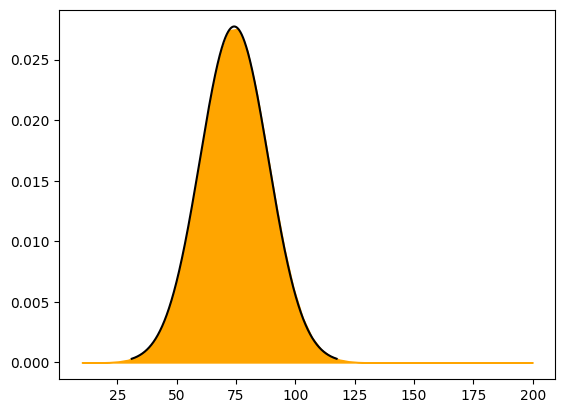

In [126]:
X = np.linspace(weight_lower_outilers,weight_upper_outilers,68937)
points = st.norm(weight_𝜇,weight_𝜎)
plt.plot(X, points.pdf(X), 'black')
A = np.linspace(min,max)
plt.fill_between(A, points.pdf(A), color='orange')

In [127]:
sum(np.abs(stats.zscore(df["weight"])) < 3)

68242

In [128]:
# Removing weight outliers
df=df[(np.abs(stats.zscore(df["weight"])) < 3)]

In [129]:
weight_𝜇 = df["weight"].mean()
weight_𝜎 = df["weight"].std()
min=df["weight"].min()
max=df["weight"].max()

weight_lower_outilers=weight_𝜇-3*weight_𝜎
weight_upper_outilers=weight_𝜇+3*weight_𝜎

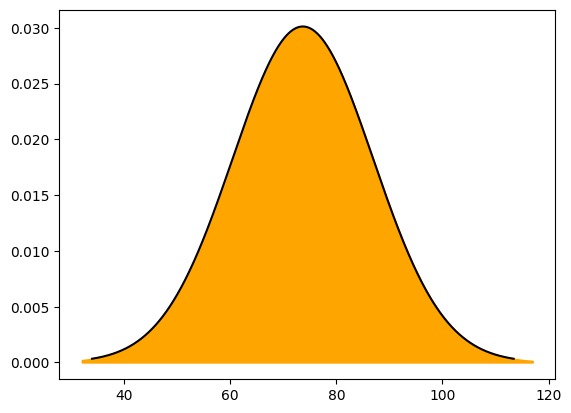

In [130]:
X = np.linspace(weight_lower_outilers,weight_upper_outilers,68937)
points = st.norm(weight_𝜇,weight_𝜎)
plt.plot(X, points.pdf(X), 'black')
A = np.linspace(min,max)
plt.fill_between(A, points.pdf(A), color='orange')

In [131]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,pulse_pressure,cholesterol,gluc,smoke,alco,active,cardio
count,68242.000000,68242.000000,68242.000000,68242.000000,68242.000000,68242.000000,68242.000000,68242.000000,68242.000000,68242.000000,68242.000000,68242.000000,68242.000000
mean,19472.295815,1.348905,164.331951,73.672549,126.934219,81.563480,45.370739,1.364057,1.223762,0.087468,0.053252,0.804211,0.497480
std,2466.970515,0.476627,8.143940,13.247064,16.878401,9.608605,11.609522,0.678433,0.569558,0.282522,0.224537,0.396809,0.499997
min,10798.000000,1.000000,55.000000,32.000000,80.000000,60.000000,10.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17668.000000,1.000000,159.000000,65.000000,120.000000,80.000000,40.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19706.000000,1.000000,165.000000,72.000000,120.000000,80.000000,40.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21329.000000,2.000000,170.000000,82.000000,140.000000,90.000000,50.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,117.000000,240.000000,200.000000,120.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


## Height Cleaning

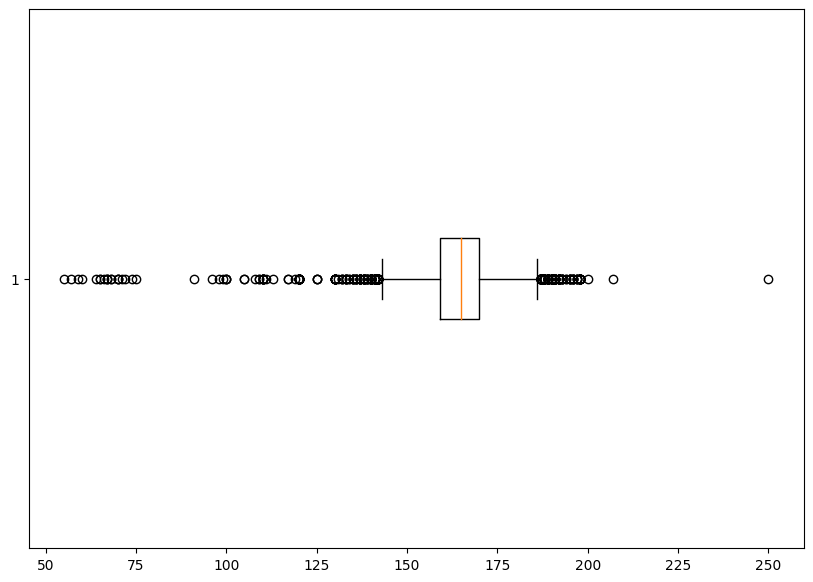

In [132]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(df["height"],vert = 0)
plt.show()

In [133]:
## Outliers with sigma
height_lower_outilers=df["height"].mean()-3*df["height"].std()
height_upper_outilers=df["height"].mean()+3*df["height"].std()

In [134]:
print("Number of Upper Outliers is:",sum(df["height"]>height_upper_outilers))
print("Number of Lower Outliers is:",sum(df["height"]<height_lower_outilers))

Number of Upper Outliers is: 131
Number of Lower Outliers is: 137


In [135]:
sum(np.abs(stats.zscore(df["height"])) < 3)

67974

In [136]:
df=df[(np.abs(stats.zscore(df["height"])) < 3)]

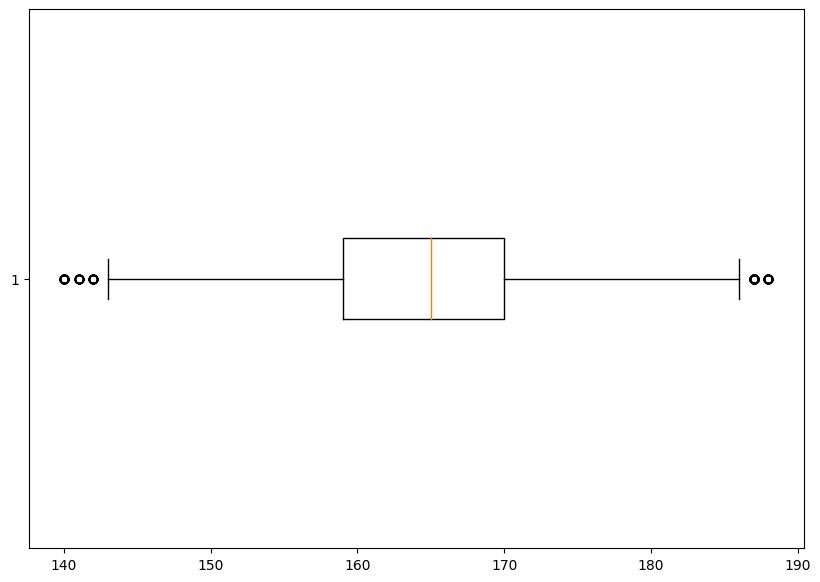

In [137]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(df["height"],vert = 0)
plt.show()

## Creating profile of cleaned data

In [138]:
profile_clean = pf.ProfileReport(df)
profile_clean
profile_clean.to_file("../templates/AnalysisClean.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 77.13it/s]


## Exploring Data after cleaning

In [139]:
df.shape

(67974, 13)

In [140]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,pulse_pressure,cholesterol,gluc,smoke,alco,active,cardio
count,67974.000000,67974.000000,67974.000000,67974.000000,67974.000000,67974.000000,67974.000000,67974.000000,67974.000000,67974.000000,67974.000000,67974.000000,67974.000000
mean,19473.104805,1.348104,164.375099,73.653507,126.938006,81.567320,45.370686,1.364522,1.223968,0.087313,0.053197,0.804484,0.497558
std,2466.588362,0.476373,7.696455,13.227333,16.881247,9.606756,11.613279,0.678778,0.569766,0.282295,0.224427,0.396600,0.499998
min,10798.000000,1.000000,140.000000,32.000000,80.000000,60.000000,10.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17670.000000,1.000000,159.000000,65.000000,120.000000,80.000000,40.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19706.000000,1.000000,165.000000,72.000000,120.000000,80.000000,40.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21329.000000,2.000000,170.000000,82.000000,140.000000,90.000000,50.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,188.000000,117.000000,240.000000,200.000000,120.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67974 entries, 0 to 69300
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             67974 non-null  int64  
 1   gender          67974 non-null  int64  
 2   height          67974 non-null  int64  
 3   weight          67974 non-null  float64
 4   ap_hi           67974 non-null  int64  
 5   ap_lo           67974 non-null  int64  
 6   pulse_pressure  67974 non-null  int64  
 7   cholesterol     67974 non-null  int64  
 8   gluc            67974 non-null  int64  
 9   smoke           67974 non-null  int64  
 10  alco            67974 non-null  int64  
 11  active          67974 non-null  int64  
 12  cardio          67974 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 7.3 MB


In [142]:
cardio_count=df["cardio"].value_counts()
cario_percent = ( df["cardio"].value_counts() / df['cardio'].count()) * 100

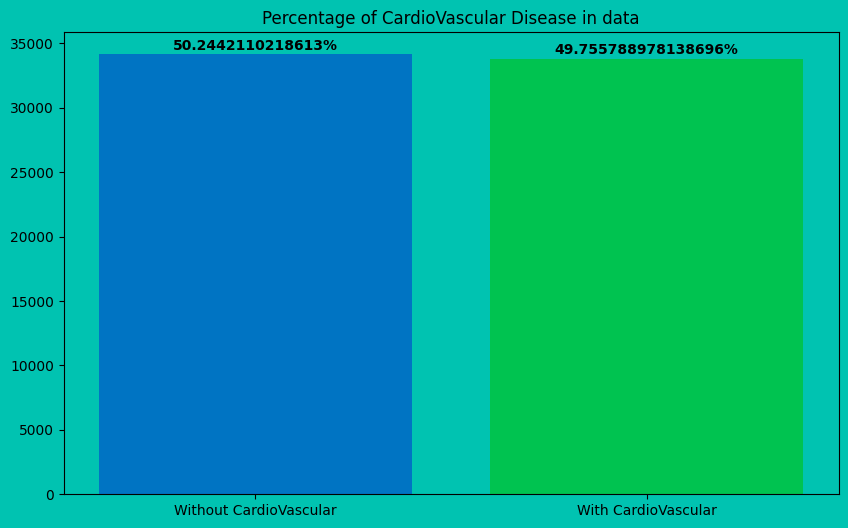

In [143]:
fig = plt.figure(figsize=(10,6),facecolor='#00c3b1')
ax = fig.add_subplot(1, 1, 1)

ax.set_facecolor("#00c3b1")

colors_list = ['#0074c3','#00c350']
graph = plt.bar(["Without CardioVascular","With CardioVascular"],cardio_count, color = colors_list)
plt.title('Percentage of CardioVascular Disease in data')

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,y+height*1.01,str(cario_percent[i])+'%',ha='center',weight='bold')
    i+=1
    
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15904\2936690794.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax=ax);


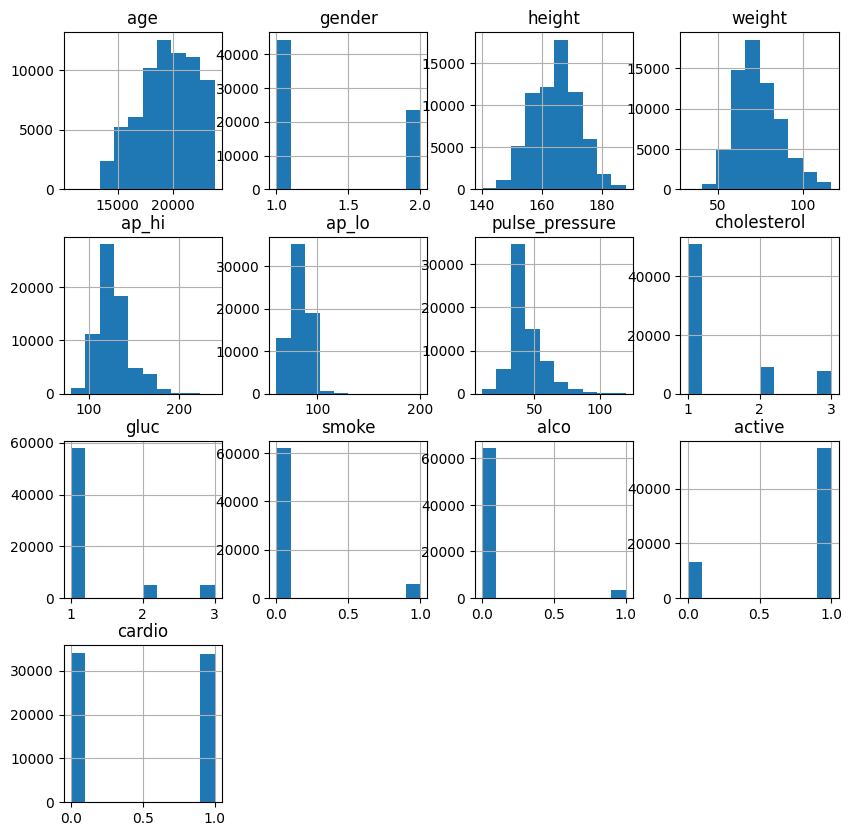

In [144]:
fig= plt.figure(figsize=(10,10))
ax= fig.gca()
df.hist(ax=ax);

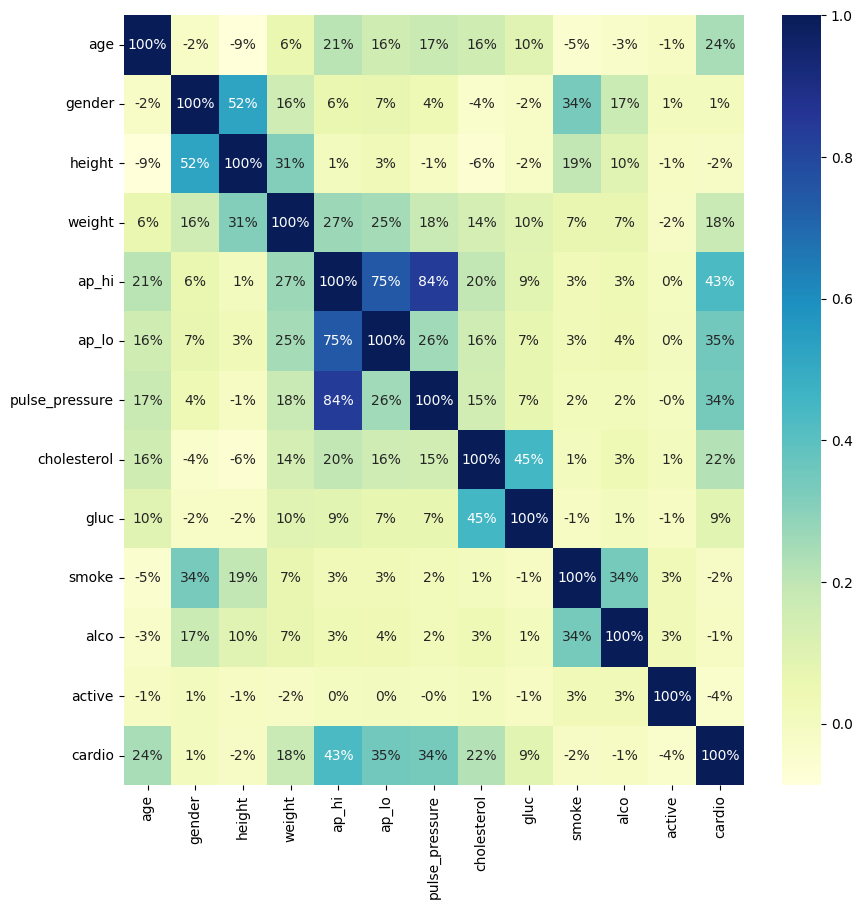

In [145]:
plt.figure(figsize=(10,10))
cor = df.corr()
sns.heatmap(cor, annot=True, fmt=".0%",cmap="YlGnBu")
plt.show()

In [146]:
cor

,age,gender,height,weight,ap_hi,ap_lo,pulse_pressure,cholesterol,gluc,smoke,alco,active,cardio
age,1.000000,-0.022461,-0.086851,0.064180,0.209583,0.157829,0.174094,0.155423,0.098989,-0.046652,-0.028324,-0.010321,0.240394
gender,-0.022461,1.000000,0.522952,0.162531,0.062388,0.066747,0.035474,-0.036776,-0.021981,0.337387,0.169980,0.007421,0.007028
height,-0.086851,0.522952,1.000000,0.312613,0.009696,0.026631,-0.007935,-0.058902,-0.022748,0.194815,0.096020,-0.006979,-0.017044
weight,0.064180,0.162531,0.312613,1.000000,0.265767,0.249969,0.179543,0.139161,0.099023,0.066847,0.066244,-0.016327,0.180108
ap_hi,0.209583,0.062388,0.009696,0.265767,1.000000,0.747339,0.835401,0.195303,0.091378,0.027389,0.034627,0.001475,0.432278
ap_lo,0.157829,0.066747,0.026631,0.249969,0.747339,1.000000,0.259123,0.162374,0.071135,0.025296,0.036360,0.003420,0.348534
pulse_pressure,0.174094,0.035474,-0.007935,0.179543,0.835401,0.259123,1.000000,0.149577,0.073984,0.018888,0.020256,-0.000685,0.340052
cholesterol,0.155423,-0.036776,-0.058902,0.139161,0.195303,0.162374,0.149577,1.000000,0.450031,0.009487,0.034852,0.009809,0.220359
gluc,0.098989,-0.021981,-0.022748,0.099023,0.091378,0.071135,0.073984,0.450031,1.000000,-0.006426,0.008414,-0.007778,0.087697
smoke,-0.046652,0.337387,0.194815,0.066847,0.027389,0.025296,0.018888,0.009487,-0.006426,1.000000,0.340719,0.026463,-0.016052


## Data Spliting

In [147]:
# Exporting Clean data
df.to_csv('Data/clean_data.csv')

In [148]:
X=df[["age","gender", "height" , "weight" ,"ap_hi", 'ap_lo','pulse_pressure' ,'cholesterol', 'gluc', 'smoke', 'alco', 'active']]
y=df["cardio"]
X_train, X_test, y_train, y_test  = train_test_split(X, y,test_size=0.2, random_state=33)

In [149]:
X_train.shape

(54379, 12)

In [150]:
X_test.shape

(13595, 12)

In [151]:
train, test= train_test_split(df,test_size=0.2, random_state=33)

In [152]:
test.shape

(13595, 13)

In [153]:
# Exporting TEST data
test.to_csv('Data/test.csv')

## Model Training

### Searching for best parameters by GRID SEARCH

In [154]:
rf_Model = RandomForestClassifier(criterion = 'gini')

In [155]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 120, num = 10)]
# Number of features to consider at every split
# max_features = ['auto']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(start = 1, stop = 30, num = 2)]
# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in np.linspace(start = 1, stop = 15, num = 2)]
# Minimum number of samples required at each leaf node
min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 30, num = 2)]
# Method of selecting samples for training each tree
# bootstrap = [True, False]
bootstrap = [True]

In [156]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 22, 34, 46, 58, 71, 83, 95, 107, 120], 'max_depth': [1, 30], 'min_samples_split': [1, 15], 'min_samples_leaf': [1, 30], 'bootstrap': [True]}


In [157]:
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 10, verbose=2, n_jobs = 4)

In [158]:
# rf_Grid.fit(X_train, y_train)

In [159]:
# rf_Grid.best_params_

In [160]:
# print (f'Train Accuracy - : {rf_Grid.score(X_train,y_train):.3f}')
# print (f'Test Accuracy - : {rf_Grid.score(X_test,y_test):.3f}')

### Final Model

In [161]:
forest_model_classification = RandomForestClassifier(n_estimators = 58,max_depth=30,min_samples_leaf=30 ,min_samples_split=15,bootstrap= True,criterion = 'gini', n_jobs = -1,random_state=20)
forest_model_classification.fit(X_train.values , y_train.values)
y_pred = forest_model_classification.predict(X_test.values)   
score=metrics.accuracy_score(y_test.values , y_pred )
print("Score is: ", score)

Score is:  0.7403457153365208


In [162]:
print (f'Train Accuracy - : {forest_model_classification.score(X_train.values,y_train.values):.3f}')
print (f'Test Accuracy - : {forest_model_classification.score(X_test.values,y_test.values):.3f}')

Train Accuracy - : 0.748
Test Accuracy - : 0.740


In [163]:
cm=metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[5438 1489]
 [2041 4627]]


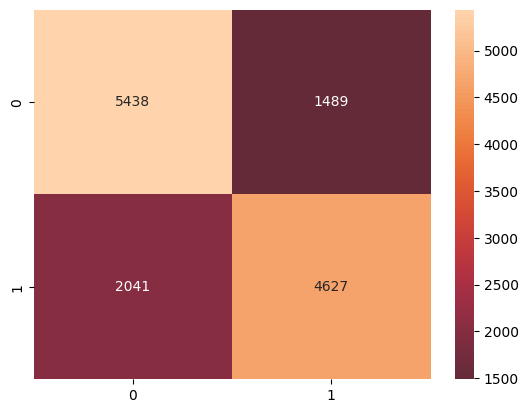

In [164]:
sns.heatmap(cm, center = True, annot=True, fmt="d")
plt.show()

In [165]:
forest_model_classification.feature_importances_

array([0.14446209, 0.00476664, 0.02414378, 0.04775689, 0.39346342,
       0.13801772, 0.14854146, 0.07699823, 0.0092661 , 0.00341498,
       0.00190513, 0.00726356])

In [166]:
forest_model_classification.classes_

array([0, 1], dtype=int64)

In [167]:
forest_model_classification.predict(np.array([18783,2,168,88,160,80,40,1,1,1,0,1]).reshape(1,-1))

array([1], dtype=int64)

In [168]:
prob=forest_model_classification.predict_proba(np.array([18783,2,168,88,160,80,40,1,1,1,0,1]).reshape(1,-1))
prob

array([[0.36526444, 0.63473556]])

In [169]:
test5=X_test.iloc[5].values.tolist()
test5

[20411.0, 1.0, 168.0, 86.0, 120.0, 80.0, 40.0, 1.0, 1.0, 0.0, 0.0, 1.0]

In [170]:
y_test.iloc[5]

0

In [171]:
forest_model_classification.predict(np.array(test5).reshape(1,-1))

array([0], dtype=int64)

In [172]:
prob=forest_model_classification.predict_proba(np.array(test5).reshape(1,-1))
prob

array([[0.63251094, 0.36748906]])

In [186]:
test50=X_test.iloc[50].values.tolist()
test50

[22807.0, 1.0, 163.0, 76.0, 140.0, 80.0, 60.0, 1.0, 1.0, 0.0, 0.0, 1.0]

In [187]:
y_test.iloc[50]

1

In [188]:
forest_model_classification.predict(np.array(test50).reshape(1,-1))

array([1], dtype=int64)

In [189]:
prob=forest_model_classification.predict_proba(np.array(test50).reshape(1,-1))
prob

array([[0.1608675, 0.8391325]])

In [190]:
prob[0,1]

0.839132497141635

In [204]:
test200=X_test.iloc[200].values.tolist()
test200

[21331.0, 2.0, 174.0, 69.0, 150.0, 90.0, 60.0, 1.0, 1.0, 1.0, 0.0, 1.0]

In [205]:
y_test.iloc[200]

1

In [206]:
forest_model_classification.predict(np.array(test200).reshape(1,-1))

array([1], dtype=int64)

In [207]:
prob=forest_model_classification.predict_proba(np.array(test200).reshape(1,-1))
prob

array([[0.16991294, 0.83008706]])

In [209]:
prob[0,1]

0.83008705583842

In [382]:
pickle.dump(forest_model_classification,open('RandomModelClassifier.pkl',"wb"))